In [27]:
# importing required libraries and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas
pd.set_option('display.max_colwidth', None)

In [28]:
# Reading in data
df = pd.read_csv("crimeall.csv", sep = ',')
# Below removed series are sourced from the Official Designations from the City of Pittsburgh
df = df[df['INCIDENTNEIGHBORHOOD'] != 'Outside County']                 # This is not a Pittsburgh Neighborhood
df = df[df['INCIDENTNEIGHBORHOOD'] != 'Outside State']                  # This is not a Pittsburgh Neighborhood
df = df[df['INCIDENTNEIGHBORHOOD'] != 'Mt. Oliver Boro']                # This is not a Pittsburgh Neighborhood  ***Mt. Oliver is a 
                                                                        # Pittsburgh neighborhood, but Mt. Oliver Boro is not.***

# I merged Mount Oliver and Mt. Oliver Neighborhood, I checked the street addresses of them and they are the same neighborhood. This error
# in the dataset might be due to Mt. Oliver Boro being included but not being a neighborhood a part of Pittsburgh. So some officers added 
# the "neighborhood" at the end to help clarify.
df = df.replace(to_replace = 'Mt. Oliver Neighborhood', value ='Mount Oliver')
# display(df)                                               # testing purposes

In [29]:
# Data comprises police reports in the Pittsburgh Area from 2015 to the present
# Only Pitt police, no campus police or port authority

df_sub = df.INCIDENTNEIGHBORHOOD.value_counts()     # stores count of each unique value
df_reverse = df_sub.iloc[::-1]                      # reversing data frame to show from lowest value....a better way might exist
df_reverse10 = df_reverse.iloc[:10]                 # show only first 10 neighborhoods
df_reverse10


Troy Hill-Herrs Island    252
Ridgemont                 264
Chartiers City            271
New Homestead             290
East Carnegie             364
Swisshelm Park            372
Summer Hill               440
Arlington Heights         443
Regent Square             461
Hays                      473
Name: INCIDENTNEIGHBORHOOD, dtype: int64

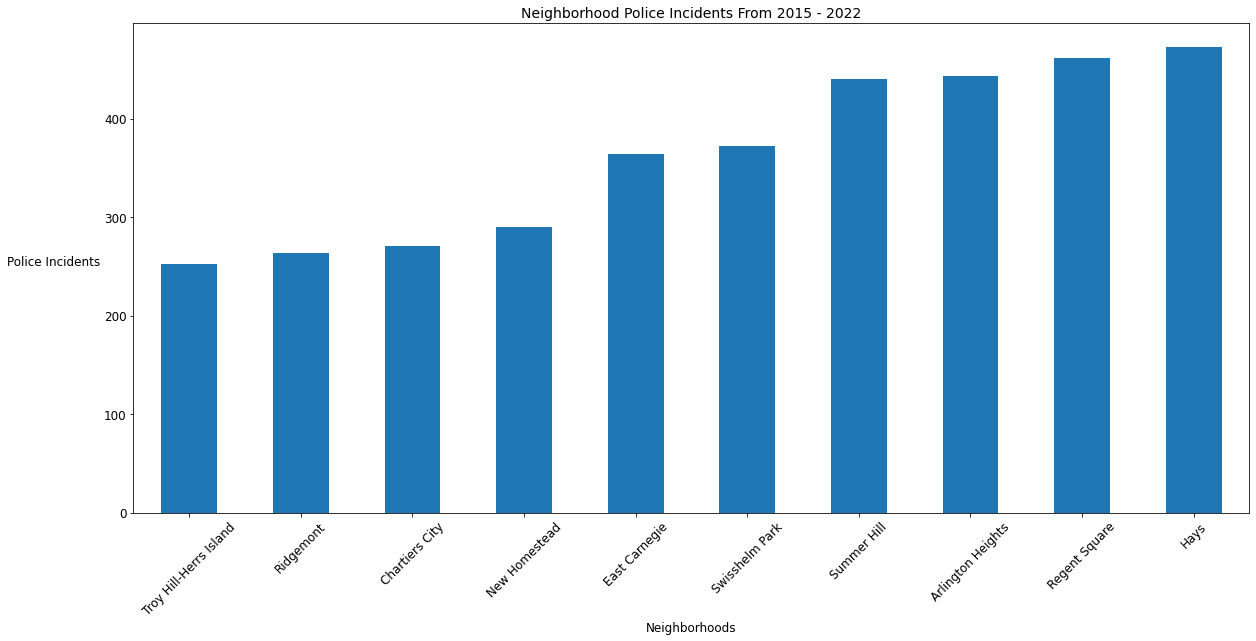

In [30]:
plt.rcParams["figure.figsize"] = [20,9]     # setting graph size or else it's too small
df_reverse10.plot.bar()                     # graphing our dataframe
plt.title("Neighborhood Police Incidents From 2015 - 2022", fontsize = 14)   # graph title
plt.xticks(fontsize = 12,rotation=45)       # rorate x-axis for readability
plt.xlabel("Neighborhoods", fontsize = 12)  # set x-axis label

plt.yticks(fontsize = 12)                   # rotate x-axis for readability
plt.ylabel("Police Incidents", fontsize = 12, rotation = 0, labelpad = 50)  # y-axis label, padding because it enters the graph body
plt.show()                                  # show graph more cleanly

# herrs island is part of troy hill neighborhood

##### Conclusion
This data set had over 277000 rows of data, each representing 1 police incident in a Pittsburgh neighborhood over the span of 7 years. I organized the data so that each neighborhood had a score(the number of police incidents). The lower the score, the safer the neighborhood is. In result, the Troy Hill-Herrs Island Neighborhood had the least amount of incidents, and therefore was the "best" neighborhood for my submetric. The data driven determination of the "best" neighbohood is different from my personal favorite. East Liberty is my personal favorite, simply because I live there.........although......definitely wouldn't recommend living here though. Kinda dangerous at night. O.O

In [31]:
# # For final due date:
# # Merge map with csv
# neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read shp
# df_sub['East Liberty'] = 9999999999

# df_merge = df_sub.rename_axis('INCIDENTNEIGHBORHOOD').to_frame('count')
# steps_map = neighborhoods.merge(df_merge, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
# steps_map.plot(column='count', # set the data to be used for coloring
#                cmap='OrRd',              # choose a color palette
#                edgecolor="white",        # outline the districts in white
#                legend=True,              # show the legend
#                legend_kwds={'label': "Lit-ness" }, # label the legend
#                figsize=(15, 10),         # set the size
#                missing_kwds={"color": "white"} # set disctricts with no data to gray
#                )
# plt.title("WHO DA BEST NEIGHBORHOOD...EAST LIBERTYYYYY", fontsize = 20)   # graph title
# plt.xticks(fontsize = 12,rotation=0)       # rorate x-axis for readability
# plt.show